In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']= (20,10)


In [4]:
df1= pd.read_csv('bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [8]:
df1.drop(['area_type','society','balcony','availability'],axis=1,inplace=True)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


**data cleaning**

In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df1.dropna(inplace=True)
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df1['bhk']=df1['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df1[df1.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df1.total_sqft.unique()  #'1133 - 1384'

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [22]:
convert_sqft_to_num('34.46Sq. Meter')  # didn't return

In [23]:
df1['total_sqft']=df1['total_sqft'].apply(convert_sqft_to_num)

In [24]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
df1.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [26]:
df1['price_per_sqft']=df1['price']*100000/df1['total_sqft']

In [27]:
df1['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13246, dtype: float64

In [28]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
len(df1.location.unique())

1304

In [30]:
df1.location.apply(lambda x: x.strip())  # clean white space
location_stats=df1['location'].value_counts()
location_stats

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [31]:
len(location_stats[location_stats<=10])

1063

In [32]:
location_stats_less_then_10 = location_stats[location_stats<=10]
location_stats_less_then_10

location
Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: count, Length: 1063, dtype: int64

In [33]:
len(df1.location.unique())

1304

In [34]:
df1.location= df1.location.apply(lambda x: 'other' if x in location_stats_less_then_10 else x)

In [35]:
len(df1.location.unique())

242

In [36]:
df1.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


**outlier detection or outlier remove**

In [38]:
df1[df1.total_sqft/df1.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [39]:
df1.shape

(13246, 7)

In [40]:
df2=df1[~(df1.total_sqft/df1.bhk<300)]
df2.shape

(12502, 7)

In [41]:
df2.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
def remove_pps_outliers(df):
    df_out =pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out

In [43]:
df3= remove_pps_outliers(df2)
df3.shape

(10244, 7)

**visualisation**

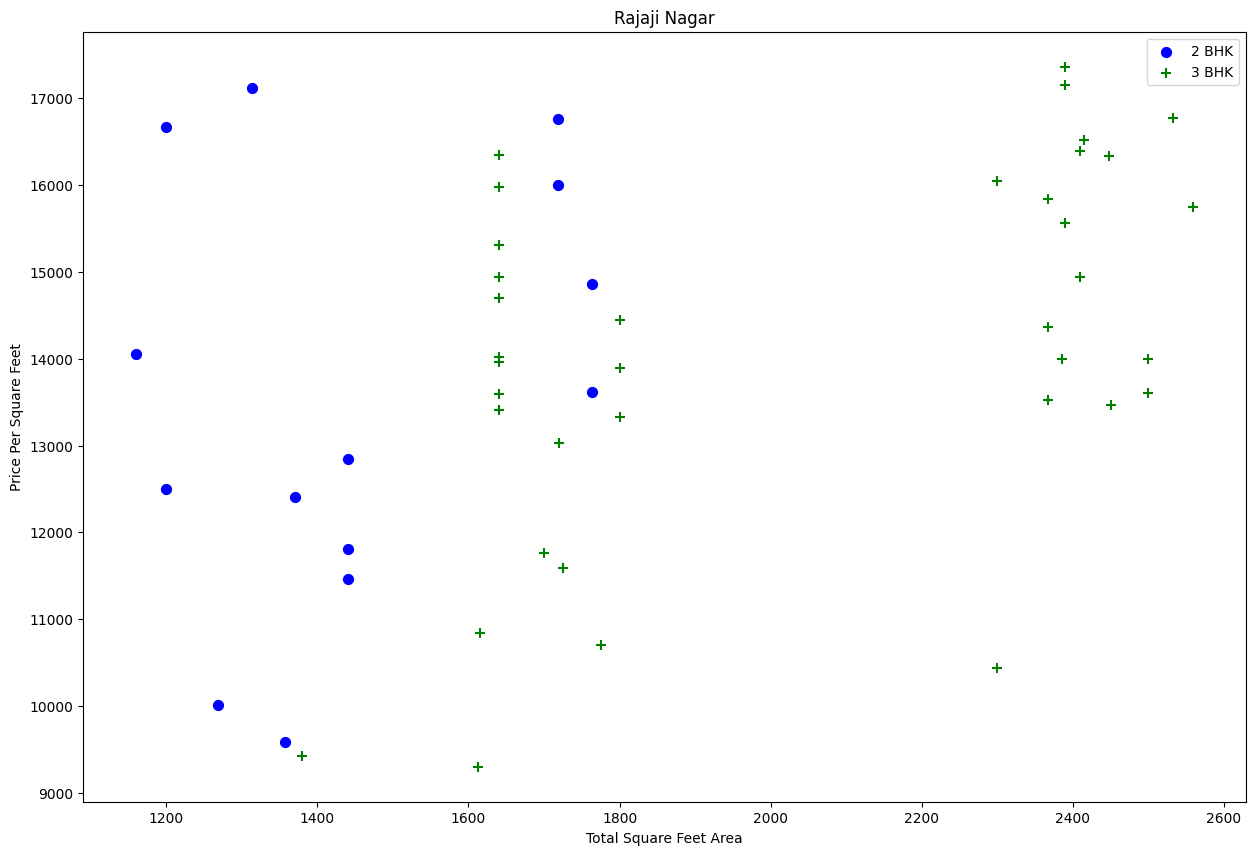

In [45]:
def  plot_scatter_chart(df,location):
    bhk2= df[(df.location==location) & (df.bhk==2)]
    bhk3= df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK' , s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df3,'Rajaji Nagar')

**Now we can remove 2 BHK apartment whose price_per_sqft is less then ,mean price_per_sqft of 1 bhk apartment**

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
         bhk_stats={}
         for bhk, bhk_df in location_df.groupby('bhk'):
             bhk_stats[bhk]={
               'mean': np.mean(bhk_df.price_per_sqft),
               'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
             }
         for bhk,bhk_df in location_df.groupby('bhk'):
             stats = bhk_stats.get(bhk-1)
             if stats and stats['count']>5:
                    exclude_indeces = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indeces, axis='index')

In [48]:
df4=remove_bhk_outliers(df3)
df4.shape

(10241, 7)

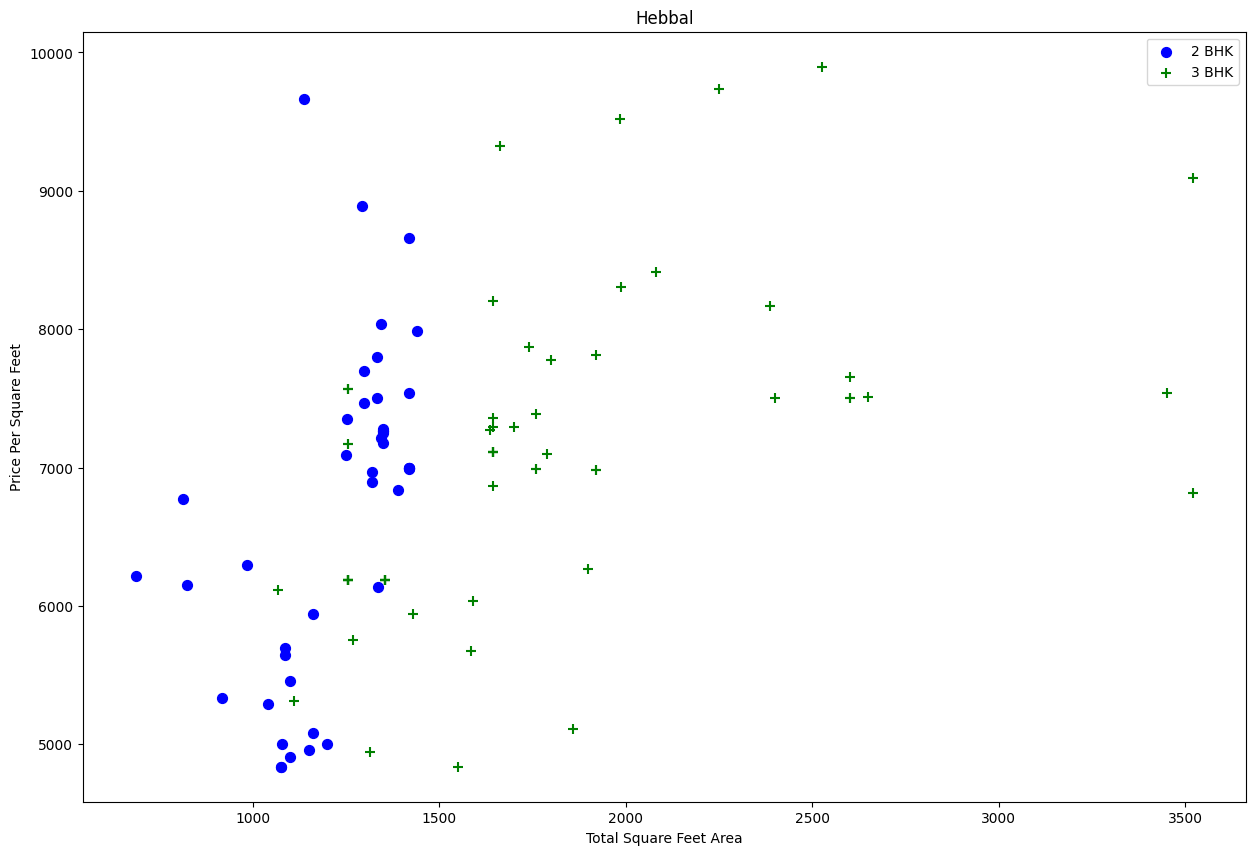

In [49]:
plot_scatter_chart(df4,"Hebbal")

In [50]:
# otlier are removed

Text(0, 0.5, 'count')

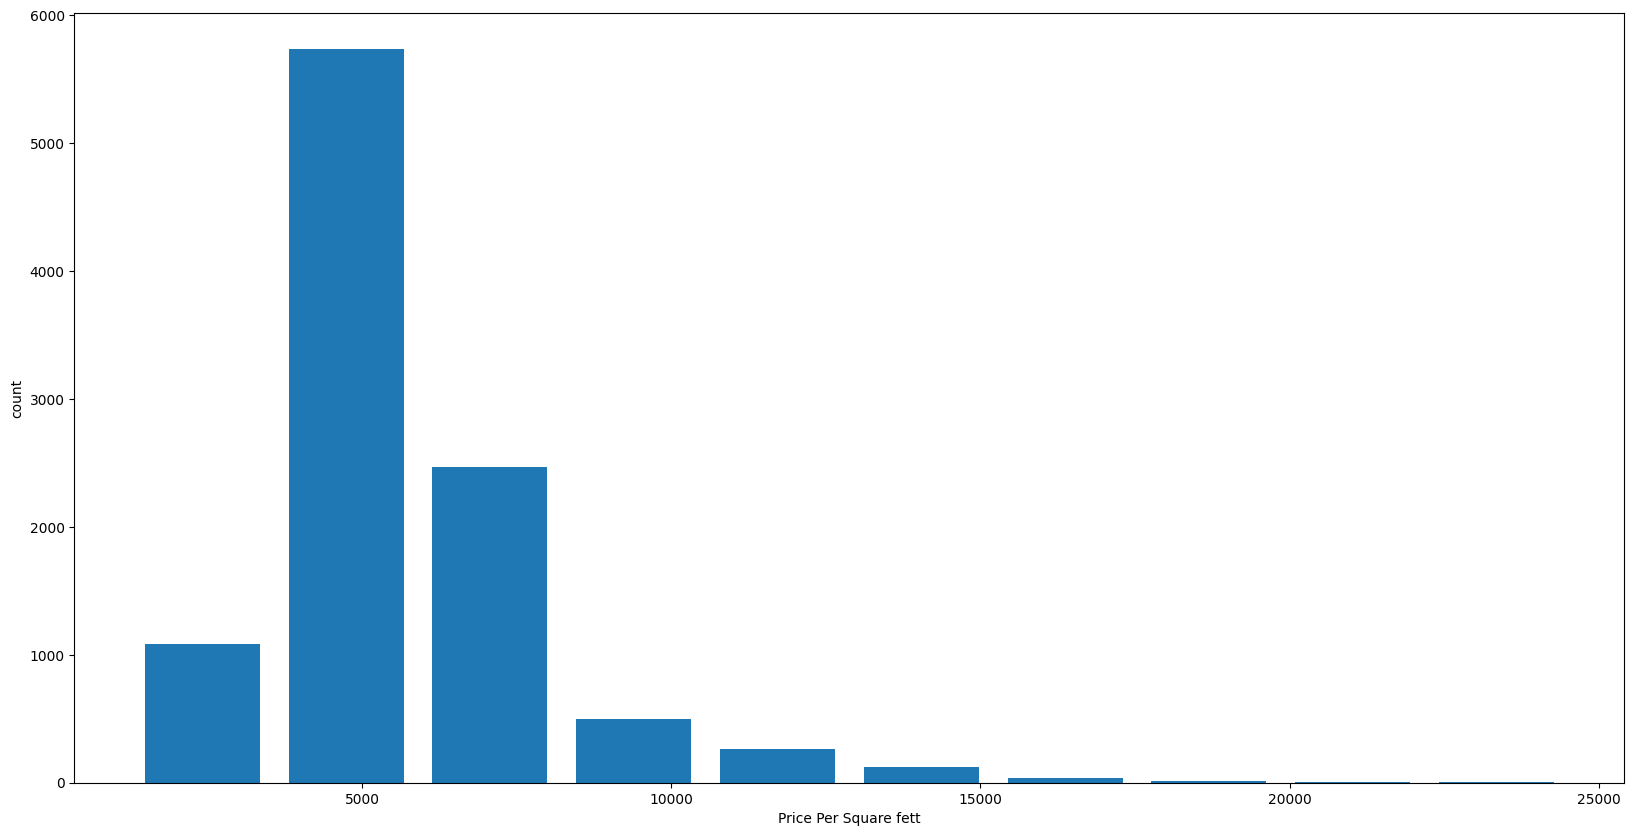

In [51]:
# plot bar 
import matplotlib
matplotlib.rcParams["figure.figsize"] =(20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square fett")
plt.ylabel("count")

In [52]:
df4.bath.unique()


array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [53]:
df4[df4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8481,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8570,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

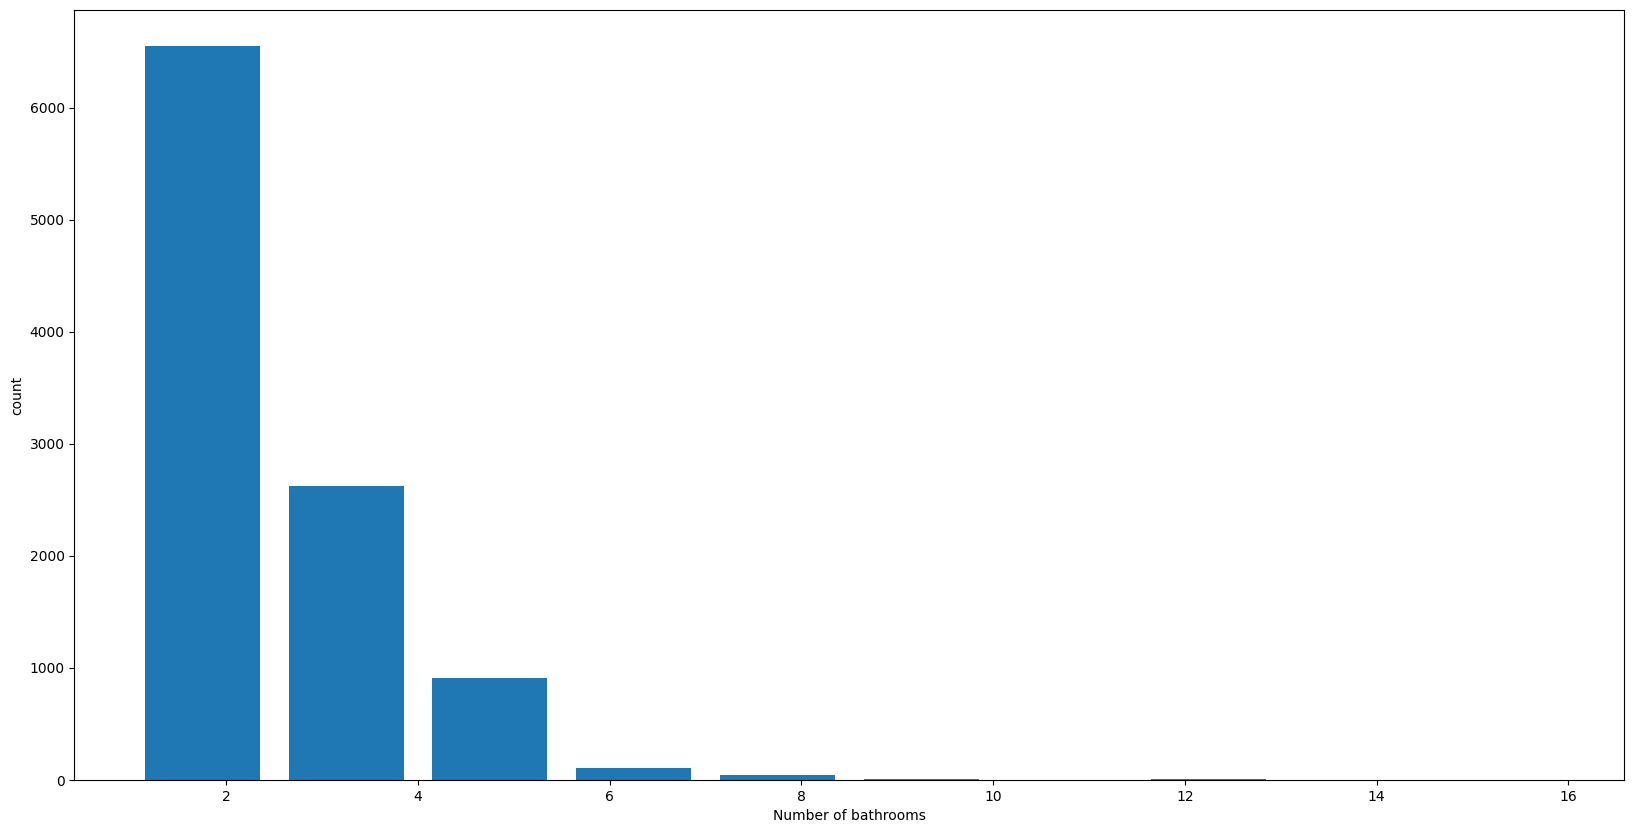

In [54]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [55]:
df4[df4.bath>df4.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [56]:
df5=df4[df4.bath<df4.bhk+2]
df5.shape

(10147, 7)

In [57]:
df5=df5.drop(['size','price_per_sqft'],axis='columns')
df5.head(3)

,location,total_sqft,bath,price,bhk
0,Devarachikkanahalli,1250.0,2.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2


**One hot encoding**

In [59]:
dummies=pd.get_dummies(df5.location).astype(int)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df6=pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
df6.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,44.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df7=df6.drop('location',axis='columns')
df7.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,44.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df7.shape

(10147, 245)

In [153]:
X=df7.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y=df7.price
y.head()

0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

In [155]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=10)


In [161]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (8117, 244)
y_train shape: (8117,)


In [165]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)



LinearRegression()

In [167]:
lr.score(X_test,y_test)

0.8144584994205005

In [169]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2 , random_state=0)
cross_val_score(LinearRegression() ,X,y,cv=cv)


array([0.7393061 , 0.7971139 , 0.82368517, 0.80299334, 0.85509885])

**Grid seearch CV**

In [171]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.preprocessing import StandardScaler
import pandas as pd

def find_best_model_using_gridsearch_cv(X, y):
    # Scale the input features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }  # 'normalize' is removed as it's no longer valid
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_scaled, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage (ensure x and y are defined):
# results = find_best_model_using_gridsearch_cv(x, y)
# print(results)
find_best_model_using_gridsearch_cv(X, y)

,model,best_score,best_params
0,linear_regression,0.803639,{'fit_intercept': True}
1,lasso,0.786203,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.642209,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [71]:
# the linear regression has good score

In [189]:

def predict_price(location, sqft, bath, bhk):
    # Get the index of the location column in the feature matrix
    loc_index = np.where(X.columns == location)[0][0]

    # Create a feature vector initialized with zeros
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    # Set the location feature to 1 based on the location index
    if loc_index >= 0:
        x[loc_index] = 1

    # Convert the feature vector to a DataFrame with column names
    x = pd.DataFrame([x], columns=X.columns)  # This ensures the correct column names

    # Make the prediction using the model
    return lr.predict(x)[0]

In [191]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [193]:
np.where(X.columns=='2nd Stage Nagarbhavi') [0][0]

7

In [195]:
predict_price('1st Phase JP Nagar',1000,2,2)

90.37880812181669

In [197]:
predict_price('1st Phase JP Nagar',1000,3,3)

93.69016432345676

In [199]:
predict_price(' Devarachikkanahalli',1000,3,3)

40.33237722603859

**to save in pickle file**

In [79]:
import pickle
with open('bangalore_home_price.pkl','wb') as f:
    pickle.dump(lr,f)

In [80]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))